In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import csv file and store as global_footprint <br>
Necessary to add the argument encoding="latin-1/"

In [213]:
global_footprint = pd.read_csv("C:\Vitor\Cursos\Datacamp\Global_Ecological_Footprint_2023.csv", encoding="latin-1")

Select the columns of interest

In [214]:
list_col = ['Country','Region', 'Per Capita GDP', 'Total Ecological Footprint (Consumption)']
footprint_sel = global_footprint[list_col]
print(footprint_sel.head())

               Country                     Region Per Capita GDP  \
0          Afghanistan   Middle East/Central Asia            NaN   
1              Albania               Other Europe       $14,889    
2              Algeria                     Africa       $11,137    
3               Angola                     Africa        $6,304    
4  Antigua and Barbuda  Central America/Caribbean       $18,749    

   Total Ecological Footprint (Consumption)  
0                                       0.8  
1                                       2.1  
2                                       2.2  
3                                       0.9  
4                                       2.9  


Identify the top 10 countries with most Ecological footprint consumption and their respective regions 

In [215]:
sort_by_footprint = footprint_sel.sort_values('Total Ecological Footprint (Consumption)', ascending=False)
top10_country_footprint = sort_by_footprint[['Country', 'Region', 'Total Ecological Footprint (Consumption)']].iloc[:10]
print(top10_country_footprint)

                  Country                     Region  \
131                 Qatar   Middle East/Central Asia   
99             Luxembourg                      EU-27   
171  United Arab Emirates   Middle East/Central Asia   
91                 Kuwait   Middle East/Central Asia   
10                Bahrain   Middle East/Central Asia   
54                Estonia                      EU-27   
23      Brunei Darussalam               Asia-Pacific   
94                 Latvia                      EU-27   
109              Mongolia               Asia-Pacific   
15                 Belize  Central America/Caribbean   

     Total Ecological Footprint (Consumption)  
131                                      13.1  
99                                       11.0  
171                                       8.7  
91                                        8.6  
10                                        8.2  
54                                        8.1  
23                                        7.9  

Plot top10_country_footprint bar plot

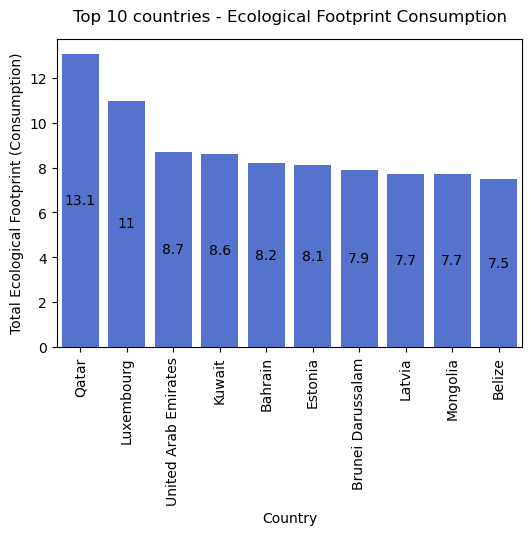

In [216]:
fig = plt.figure(figsize=(6,4))
plot_01 = sns.barplot(x='Country', y='Total Ecological Footprint (Consumption)', data=top10_country_footprint, color='royalblue')
plot_01.set_title('Top 10 countries - Ecological Footprint Consumption', y=1.03)
plt.xticks(rotation=90)
plot_01.bar_label(plot_01.containers[0], label_type='center')
plt.show()

Group by region and calculate their mean and sum of ecological footprint

In [217]:
group = footprint_sel.groupby('Region')['Total Ecological Footprint (Consumption)'].agg(['sum', 'mean']).sort_values(by='mean', ascending=False)
print(group)


                             sum      mean
Region                                    
North America               17.2  5.733333
EU-27                      133.5  5.134615
Middle East/Central Asia    91.2  3.965217
Other Europe                47.0  3.615385
Asia-Pacific                88.6  2.953333
South America               33.7  2.592308
Central America/Caribbean   51.6  2.580000
Africa                      73.4  1.384906


Creat a BarPlot with the region grouped data

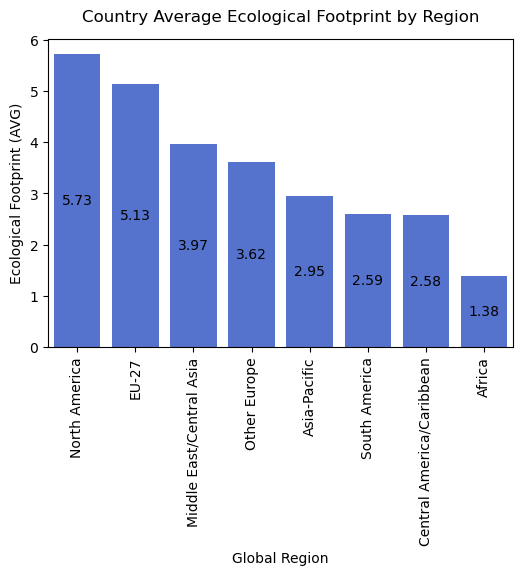

In [218]:
grouped_by_region = group.reset_index()
fig = plt.figure(figsize=(6,4))
plot_02 = sns.barplot(x='Region', y='mean', data=grouped_by_region, color='royalblue')
plt.xticks(rotation=90)
plot_02.set(xlabel='Global Region', ylabel='Ecological Footprint (AVG)')
plot_02.set_title('Country Average Ecological Footprint by Region', y=1.03)
plot_02.bar_label(plot_02.containers[0], label_type='center',fmt='%.2f')
plt.show()

Transform the data of the 'Per Capita GDP' columns, excluding the empty values and turning into FLOAT type

In [219]:
new_footprint_sel = footprint_sel.dropna()
new_footprint_sel['Per Capita GDP'] = new_footprint_sel['Per Capita GDP'].str.replace('$', '')
new_footprint_sel['Per Capita GDP'] = new_footprint_sel['Per Capita GDP'].str.replace(' ', '')
new_footprint_sel['Per Capita GDP'] = new_footprint_sel['Per Capita GDP'].str.replace(',', '')
new_footprint_sel['Per Capita GDP'] = pd.to_numeric(new_footprint_sel['Per Capita GDP'])
print(new_footprint_sel.info())


<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 1 to 179
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   165 non-null    object 
 1   Region                                    165 non-null    object 
 2   Per Capita GDP                            163 non-null    float64
 3   Total Ecological Footprint (Consumption)  165 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB
None


C:\Users\brend\AppData\Local\Temp\ipykernel_10356\2114546867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_footprint_sel['Per Capita GDP'] = new_footprint_sel['Per Capita GDP'].str.replace('$', '')
C:\Users\brend\AppData\Local\Temp\ipykernel_10356\2114546867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_footprint_sel['Per Capita GDP'] = new_footprint_sel['Per Capita GDP'].str.replace(' ', '')
C:\Users\brend\AppData\Local\Temp\ipykernel_10356\2114546867.py:4: SettingWithCopyWarning: 
A va

Plot a scatter plot to understand the correlation between 'Per Capita GDP' and 'Total Ecological Footprint'


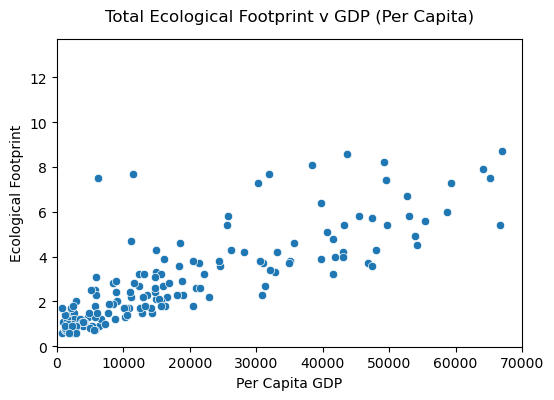

the correlation between Per Capita GDP and Total Ecological Footprint is: 0.8030716750600035


In [220]:
fig = plt.figure(figsize=(6,4))
correlation = new_footprint_sel['Per Capita GDP'].corr(new_footprint_sel['Total Ecological Footprint (Consumption)'])
plot_03 = sns.scatterplot(x='Per Capita GDP', y='Total Ecological Footprint (Consumption)', data=new_footprint_sel)
plot_03.set_title('Total Ecological Footprint v GDP (Per Capita)', y=1.03)
plot_03.set(ylabel='Ecological Footprint')
plt.xlim(0,70000)
plt.show()
print('The correlation between Per Capita GDP and Total Ecological Footprint is:', correlation)